In [7]:
import pandas as pd 
from sklearn import tree 
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('datafiles/Survived.csv')
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.shape

(891, 11)

In [12]:
#age列を平均値で穴埋める
df['Age'] = df['Age'].fillna(df['Age'].mean())
#Embarked 列を最頻値で穴埋める
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [13]:
#特徴量として利する列のリフト
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x = df[col]
t = df['Survived']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
# train のサイズの確認
x_train.shape

(712, 5)

In [15]:
#モデルの作成と学習
#blanced là để cân bằng các ảnh hưởng của những data quá lớn quá nhỏ 
model = tree.DecisionTreeClassifier(max_depth = 5,
                                   random_state = 0, class_weight = 'balanced')
model.fit(x_train, y_train )

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [16]:
#正解率を計算
model.score(X = x_test, y = y_test)

0.7374301675977654

In [17]:
#モデルのチューニングの自動化
def learn(x, t, depth = 3):
    x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0, class_weight = 'balanced')
    model.fit(x_train, y_train)
    
    score = model.score(X = x_train, y = y_train)
    score2 = model.score( X = x_test, y = y_test)
    return round(score, 3), round(score2, 3), model

In [18]:
for j in range(1,15): # j は木の深さ
    train_score, test_score, model = learn(x, t, depth = j)
    sentence = '群連データ正解りつは{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:' + sentence + sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1:群連データ正解りつは0.659テストデータの正解率0.704
深さ2:群連データ正解りつは0.699テストデータの正解率0.732
深さ3:群連データ正解りつは0.704テストデータの正解率0.737
深さ4:群連データ正解りつは0.698テストデータの正解率0.726
深さ5:群連データ正解りつは0.722テストデータの正解率0.737
深さ6:群連データ正解りつは0.77テストデータの正解率0.698
深さ7:群連データ正解りつは0.771テストデータの正解率0.648
深さ8:群連データ正解りつは0.781テストデータの正解率0.631
深さ9:群連データ正解りつは0.83テストデータの正解率0.704
深さ10:群連データ正解りつは0.851テストデータの正解率0.687
深さ11:群連データ正解りつは0.878テストデータの正解率0.676
深さ12:群連データ正解りつは0.892テストデータの正解率0.654
深さ13:群連データ正解りつは0.909テストデータの正解率0.654
深さ14:群連データ正解りつは0.92テストデータの正解率0.654


In [19]:
df2 = pd.read_csv('datafiles/Survived.csv')
print(df['Age'].mean())
print(df['Age'].median())

29.699117647058763
29.69911764705882


In [20]:
 df2.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [21]:
 df2.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [22]:
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [23]:
# find max 
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc = max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [24]:
#Age 列の欠損値の行を抜き出す（欠損であればtrue
is_null = df2['Age'].isnull()

#Pclass1 に関する埋め込み
df2.loc[(df['Pclass']== 1) & (df['Survived'] ==0) & (is_null), 'Age']= 43
df2.loc[(df['Pclass']== 1) & (df['Survived'] ==1) & (is_null), 'Age']= 35

#Pclass2に関する埋め込み
df2.loc[(df['Pclass']== 2) & (df['Survived'] ==0) & (is_null), 'Age']= 34
df2.loc[(df['Pclass']== 2) & (df['Survived'] ==1) & (is_null), 'Age']= 26
         

#Pclass3 に関する埋め込み
df2.loc[(df['Pclass']== 3) & (df['Survived'] ==0) & (is_null), 'Age']= 27
df2.loc[(df['Pclass']== 3) & (df['Survived'] ==1) & (is_null), 'Age']= 21
                             
                             

In [25]:
# learn 関数を利用してモデルに再学習させる
#特徴量
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x = df2[col]
#正解変数
t = df2['Survived']

for j in range(1,15):
    s1, s2, m = learn(x, t, depth = j)
    sentence = '深さ{}訓練データの精度{}:: テストデータの精度{}'
    print(sentence.format(j, s1, s2))

深さ1訓練データの精度0.659:: テストデータの精度0.704
深さ2訓練データの精度0.684:: テストデータの精度0.654
深さ3訓練データの精度0.728:: テストデータの精度0.737
深さ4訓練データの精度0.718:: テストデータの精度0.687
深さ5訓練データの精度0.784:: テストデータの精度0.765
深さ6訓練データの精度0.801:: テストデータの精度0.777
深さ7訓練データの精度0.831:: テストデータの精度0.737
深さ8訓練データの精度0.855:: テストデータの精度0.749
深さ9訓練データの精度0.895:: テストデータの精度0.709
深さ10訓練データの精度0.912:: テストデータの精度0.67
深さ11訓練データの精度0.935:: テストデータの精度0.682
深さ12訓練データの精度0.947:: テストデータの精度0.676
深さ13訓練データの精度0.962:: テストデータの精度0.67
深さ14訓練データの精度0.968:: テストデータの精度0.676


In [26]:
sex = df2.groupby('Sex').mean()
sex['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex'>

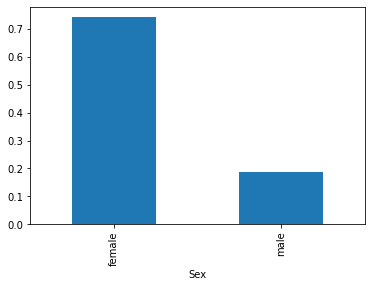

In [27]:
sex['Survived'].plot(kind = 'bar')

In [29]:
#Sex を加えて learn 関数を利用してモデルに再学習させる
#特徴量
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex']
x = df2[col]
#正解変数
t = df2['Survived']
train_score, test_score, model = learn(x,t)

ValueError: could not convert string to float: 'female'

In [31]:
male = pd.get_dummies(df2['Sex'], drop_first = True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [33]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [35]:
#Embarked の　ダミー化, droop_first= true
pd.get_dummies(df2['Embarked'], drop_first = True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [38]:
#droop_first= false
embarked = pd.get_dummies(df2['Embarked'], drop_first = False)
embarked.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [40]:
male = pd.get_dummies(df2['Sex'], drop_first = True)

In [41]:
#Concat関数で連結 axis = 1 　で横方向
x_temp = pd.concat([x, male], axis = 1)
x_temp.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0


In [43]:
x_new = x_temp.drop('Sex', axis = 1)
for j in range(1,10):
    s1, s2, m = learn(x_new, t, depth= j)
    s = '深さ{}:訓練データの精度{}:: テストデータの精度{}'
    print(s.format(j,s1,s2))

深さ1:訓練データの精度0.787:: テストデータの精度0.788
深さ2:訓練データの精度0.792:: テストデータの精度0.782
深さ3:訓練データの精度0.847:: テストデータの精度0.81
深さ4:訓練データの精度0.854:: テストデータの精度0.849
深さ5:訓練データの精度0.865:: テストデータの精度0.849
深さ6:訓練データの精度0.875:: テストデータの精度0.855
深さ7:訓練データの精度0.907:: テストデータの精度0.855
深さ8:訓練データの精度0.913:: テストデータの精度0.883
深さ9:訓練データの精度0.931:: テストデータの精度0.866


In [44]:
s1,s2,model = learn(x_new, t, depth = 5)

#save model 
import pickle
with open('survived.pkl', 'wb') as f:
    pickle.dump(model, f)

In [45]:
 model.feature_importances_

array([0.12273789, 0.23946132, 0.06850154, 0.0028017 , 0.05226171,
       0.51423583])

In [46]:
#特徴量重要度
pd.DataFrame(model.feature_importances_, index = x_new.columns)

,0
Pclass,0.122738
Age,0.239461
SibSp,0.068502
Parch,0.002802
Fare,0.052262
male,0.514236
